# Creating Teoplitz and Circulant matrices


In [ ]:
from scipy.linalg import toeplitz, circulant

In [ ]:
toeplitz([1, 2, 3], [1, 2, 5, 6])

array([[1, 2, 5, 6],
       [2, 1, 2, 5],
       [3, 2, 1, 2]])

In [ ]:
circulant([1, 5, 3])

array([[1, 3, 5],
       [5, 1, 3],
       [3, 5, 1]])

# The Fast Fourier Transform (FFT)


Module `numpy.fft`

Documentation: https://numpy.org/doc/stable/reference/routines.fft.html


## 1D FFT


In [2]:
import matplotlib.pyplot as plt
import numpy as np

We consider the signal

$f(t) = \sin(h_1 (2 \pi t)) + \frac{1}{2}\sin(h_2 (2 \pi t))$

with $h_1 = 5$ Hz and $h_2 = 13.5$ Hz.

We sample it with spacing $\Delta t = 0.01$ s. This corresponds to a sampling rate of 100 Hz.


Text(0, 0.5, 'f(t)')

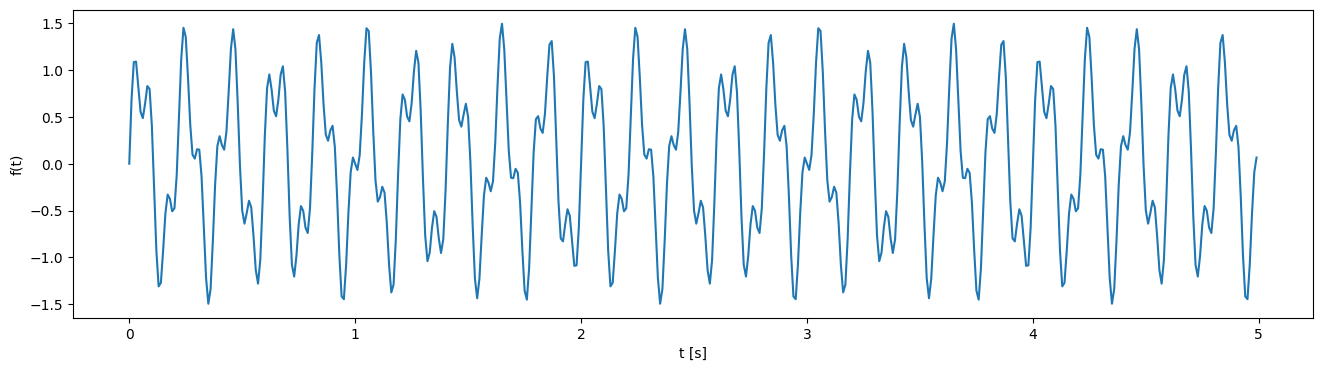

In [3]:
dt = 1e-2  # [s]
t = np.arange(0, 5, dt)
f = np.sin(5 * 2 * np.pi * t) + 0.5 * np.sin(13.5 * 2 * np.pi * t)

plt.subplots(1, 1, figsize=(16, 4))
plt.plot(t, f)
plt.xlabel("t [s]")
plt.ylabel("f(t)")

We compute the DFT (Discrete Fourier Transform) by the FFT algorithm


In [7]:
F = np.fft.fft(f)
# obtain the frequencies associated with each element of the FFT
freq = np.fft.fftfreq(len(t), d=dt)

In [6]:
f.shape, F.shape

((500,), (500,))

In [10]:
freq.shape

(500,)

We reorder the frequencies and we plot the FFT output.


In [12]:
# frequencies in freq are ordered as first the positive ones, and then the negative ones
F_shift = np.fft.fftshift(F)
freq_shift = np.fft.fftshift(freq)

Text(0.5, 0, 'frequency [Hz]')

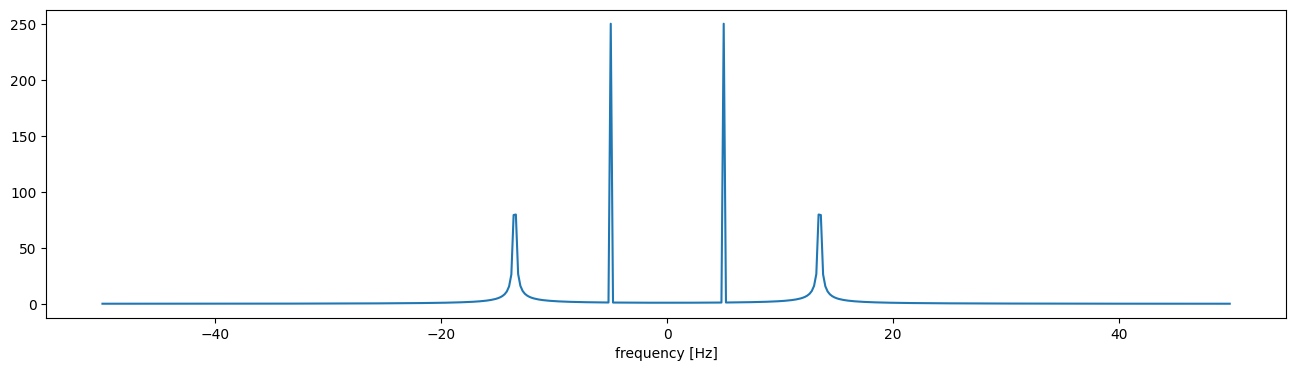

In [21]:
plt.subplots(1, 1, figsize=(16, 4))
# output of the FFT are complex numbers, so plot the absolute value
plt.plot(freq_shift, np.absolute(F_shift))
plt.xlabel("frequency [Hz]")

We reconstruct the original signal


0.0
4.228101771401199e-16


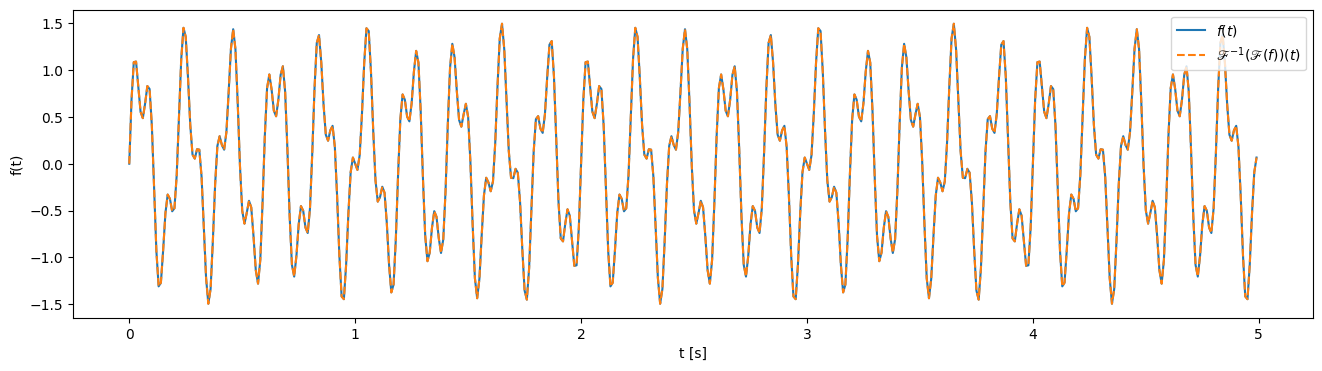

In [28]:
# RMK: I'm passing the original DFT, not the shifted one!
f_reconstructed = np.fft.ifft(F)

# Extract the real part of the reconstructed function
f_reconstructed_real = np.real(f_reconstructed)

# In fact, also the result of the inverse FT has complex numbers, because of round off errors
# -> doing calculations, imaginary parts do not cancel out but are very close to zero
print(np.mean(np.imag(f_reconstructed)))  # mean is zero
print(np.max(np.imag(f_reconstructed)))  # max is very very small

plt.subplots(1, 1, figsize=(16, 4))
plt.plot(t, f, label="$f(t)$")
plt.plot(t, f_reconstructed_real, "--", label="$\mathscr{F}^{-1}(\mathscr{F}(f))(t)$")
plt.xlabel("t [s]")
plt.ylabel("f(t)")
plt.legend()

## 2D FFT


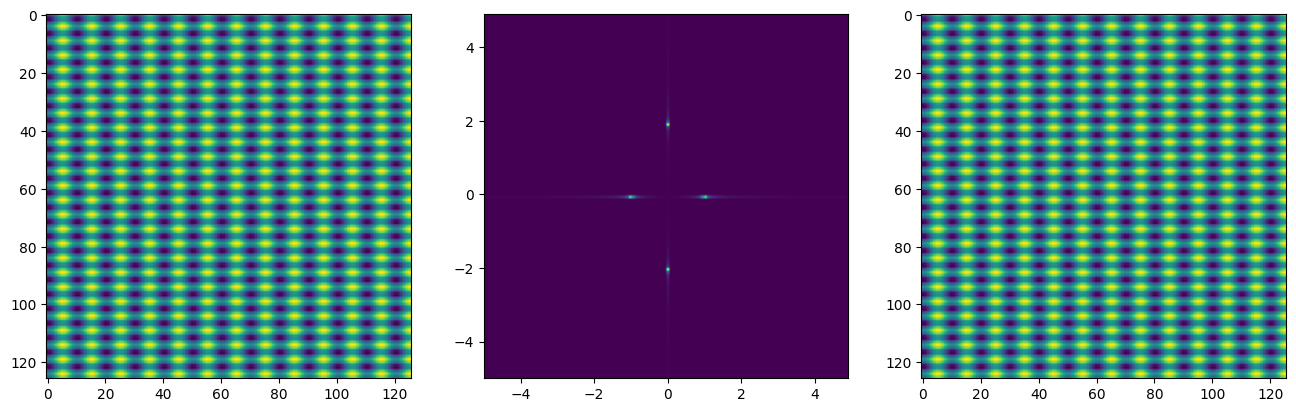

In [31]:
# create a 2D signal
x = np.arange(-2 * np.pi, 2 * np.pi, 0.1)
y = np.arange(-2 * np.pi, 2 * np.pi, 0.1)
xx, yy = np.meshgrid(x, y)
z = np.sin(2 * np.pi * 1 * xx) + np.sin(2 * np.pi * 2 * yy)
# z = np.sin(10 * np.sqrt(xx**2 + yy**2))

# FFT
Z = np.fft.fft2(z)
Z_shift = np.fft.fftshift(Z)

freq_x_shift = np.fft.fftshift(np.fft.fftfreq(len(x), d=0.1))
freq_y_shift = np.fft.fftshift(np.fft.fftfreq(len(y), d=0.1))
limits = [freq_x_shift[0], freq_x_shift[-1], freq_y_shift[0], freq_y_shift[-1]]

# iFFT
z_reconstructed = np.fft.ifft2(Z)

# plotting
fig, axs = plt.subplots(1, 3, figsize=(16, 8))
axs[0].imshow(z)
axs[1].imshow(np.absolute(Z_shift), extent=limits)
axs[2].imshow(np.real(z_reconstructed))